Let G = ({1,2,3,4,5,6,7,8,9,10},{1 → 2,2 → 1,2 → 2,2 → 6,2 → 3,3 → 4,4 → 5,5 →
 6, 6 → 1,6 → 6,6 → 7,5 → 8,7 → 9,8 → 9,5 → 1,4 → 1,6 → 11,11 → 7,7 → 10,10 →
 1, 8 → 12}).

In [1]:
import numpy as np
import networkx as nx
from matplotlib import pyplot as plt

In [2]:
G = {
    1: [2],
    2: [1, 2, 6, 3],
    3: [3],
    4: [5, 8, 1],
    5: [6, 8, 1],
    6: [1, 6, 7, 11],
    7: [9, 10],
    8: [9, 12],
    9: [],
    10: [1],
    11: [7],
    12: []
}

* Find PageRank value for each vertex representing a web-site. Beware that there are
 some some dead-ends. Assume taxation parameters β = 0 and 0.1.

In [3]:
G_nx = nx.DiGraph()
for node, directions in G.items():
    if len(directions) != 0:
            direction_probability = round(1 / len(directions), 2)
    else:
        direction_probability = 0
    for direction in directions:
        G_nx.add_edge(node, direction, probability=direction_probability)

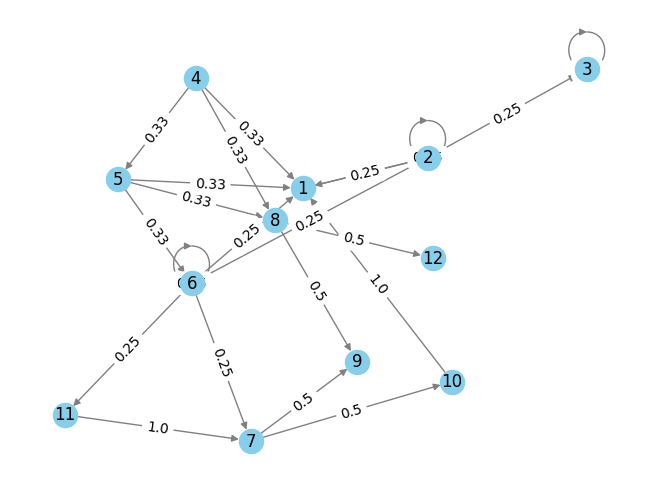

In [4]:
figure, axes = plt.subplots(1, 1, layout='constrained')
layout = nx.kamada_kawai_layout(G_nx)
edges = nx.get_edge_attributes(G_nx, 'probability')
nx.draw(G_nx, layout, with_labels=True, node_color='skyblue', edge_color='gray', ax=axes)
a = nx.draw_networkx_edge_labels(G_nx, layout, edge_labels=edges, ax=axes)

In [5]:
taxation_parameters = [0, 0.1]
pagerank_parameters = []

In [6]:
for tax in taxation_parameters:
    pagerank_parameters.append(nx.pagerank(G_nx, alpha=tax))

### $\beta = 0$ means that each time we make a jump to a random node and their connections don't change anything

In [7]:
pagerank_parameters[0]

{1: 0.08333333333333333,
 2: 0.08333333333333333,
 6: 0.08333333333333333,
 3: 0.08333333333333333,
 4: 0.08333333333333333,
 5: 0.08333333333333333,
 8: 0.08333333333333333,
 7: 0.08333333333333333,
 11: 0.08333333333333333,
 9: 0.08333333333333333,
 10: 0.08333333333333333,
 12: 0.08333333333333333}

In [8]:
pagerank_parameters[1]

{1: 0.09390413532021605,
 2: 0.08796645993749463,
 6: 0.08328902426804698,
 3: 0.08730663853188764,
 4: 0.07637687038510588,
 5: 0.07892276662567516,
 8: 0.08155352665653935,
 7: 0.08630500887814536,
 11: 0.07845909581230173,
 9: 0.08476980159974065,
 10: 0.0806921226838456,
 12: 0.08045454930100095}

### creating matrix manually

In [9]:
def create_adjacency_matrix(graph):
    number_of_nodes = len(graph)
    adjacency_matrix = np.zeros((number_of_nodes, number_of_nodes))
    for node, connections in graph.items():
        for connection in connections:
            adjacency_matrix[node - 1, connection - 1] = 1
    return adjacency_matrix

In [10]:
adjacency_matrix = create_adjacency_matrix(G)
adjacency_matrix

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [11]:
adjacency_matrix[:, 0]

array([0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0.])

In [12]:
np.sum(adjacency_matrix, axis=1)

array([1., 4., 1., 3., 3., 4., 2., 2., 0., 1., 1., 0.])

In [13]:
def calculate_pagerank(matrix, beta=0.85, iterations=100, weights=None):
    length = matrix.shape[0]
    number_of_links = np.sum(matrix, axis=1)
    graph_matrix = np.array(matrix)

    probability_values = np.ones(length) / length
    probability_weights = np.ones(length) / length
    if weights is not None:
        for node, weight in weights:
            probability_weights[node - 1] = weight
        probability_weights /= np.sum(probability_weights)
    
    for i in range(length):
        if number_of_links[i] == 0:
            graph_matrix[i, :] = 1
            number_of_links[i] = length
            
    for _ in range(iterations):
        new_probability_values = np.zeros(length)
        for i in range(length):
            new_probability_sum = np.sum(probability_values * graph_matrix[:, i] / number_of_links)
            new_probability_values[i] = (1 - beta) * probability_weights[i] + beta * new_probability_sum
        if np.allclose(new_probability_values, probability_values, atol=1e-5):
            break
        probability_values = new_probability_values
    return probability_values

In [14]:
def print_numpy_pagerank(pagerank_array):
    for index, pagerank in enumerate(pagerank_array):
        print(f'{index + 1}: {pagerank}')

### Let's compare values

In [15]:
pagerank_parameters[0]

{1: 0.08333333333333333,
 2: 0.08333333333333333,
 6: 0.08333333333333333,
 3: 0.08333333333333333,
 4: 0.08333333333333333,
 5: 0.08333333333333333,
 8: 0.08333333333333333,
 7: 0.08333333333333333,
 11: 0.08333333333333333,
 9: 0.08333333333333333,
 10: 0.08333333333333333,
 12: 0.08333333333333333}

In [16]:
pagerank1 = calculate_pagerank(adjacency_matrix, beta=0)
print_numpy_pagerank(pagerank1)

1: 0.08333333333333333
2: 0.08333333333333333
3: 0.08333333333333333
4: 0.08333333333333333
5: 0.08333333333333333
6: 0.08333333333333333
7: 0.08333333333333333
8: 0.08333333333333333
9: 0.08333333333333333
10: 0.08333333333333333
11: 0.08333333333333333
12: 0.08333333333333333


In [17]:
pagerank_parameters[1]

{1: 0.09390413532021605,
 2: 0.08796645993749463,
 6: 0.08328902426804698,
 3: 0.08730663853188764,
 4: 0.07637687038510588,
 5: 0.07892276662567516,
 8: 0.08155352665653935,
 7: 0.08630500887814536,
 11: 0.07845909581230173,
 9: 0.08476980159974065,
 10: 0.0806921226838456,
 12: 0.08045454930100095}

In [18]:
pagerank2 = calculate_pagerank(adjacency_matrix, beta=0.1)
print_numpy_pagerank(pagerank2)

1: 0.09390740740740741
2: 0.08796436149691358
3: 0.08730000964506172
4: 0.0763774112654321
5: 0.07892332175925926
6: 0.08328973765432099
7: 0.08630521797839506
8: 0.08155410879629629
9: 0.08477092978395062
10: 0.08069280478395062
11: 0.07845915316358025
12: 0.0804555362654321


* Assume that the set S = {6,8} is about sport. Find a sport-specific PageRank with
 probability of being transferred to S is γ = 0.15 in each step. Try this with and without
 taxation (i.e. β = 0 and 0.1)

In [19]:
gamma = 0.15
sport_weights = [(6, gamma), (8, gamma)]
pagerank3 = calculate_pagerank(adjacency_matrix, beta=0, weights=sport_weights)
pagerank4 = calculate_pagerank(adjacency_matrix, beta=0.1, weights=sport_weights)
print('Pagerank for gamma = 0.15 and beta = 0:')
print_numpy_pagerank(pagerank3)
print('Pagerank for gamma = 0.15 and beta = 0.1:')
print_numpy_pagerank(pagerank4)

Pagerank for gamma = 0.15 and beta = 0:
1: 0.07352941176470588
2: 0.07352941176470588
3: 0.07352941176470588
4: 0.07352941176470588
5: 0.07352941176470588
6: 0.1323529411764706
7: 0.07352941176470588
8: 0.1323529411764706
9: 0.07352941176470588
10: 0.07352941176470588
11: 0.07352941176470588
12: 0.07352941176470588
Pagerank for gamma = 0.15 and beta = 0.1:
1: 0.0842805691721133
2: 0.07781668992828614
3: 0.07710086748819898
4: 0.06743746028503994
5: 0.06968435117102396
6: 0.12784427196804649
7: 0.07769247288035584
8: 0.12494749114923748
9: 0.07756259645061728
10: 0.07131535380355847
11: 0.07063317277142339
12: 0.07368470293209876


* Let S = {1,2,6} be a set of trusted pages. Find TrustRank and SpamMass for each
 vertex. Assume taxation β = 0.1. Hint: spammassforeachvertexits PageRankminus
 TrustRank devied by TrustRank.

In [26]:
def calculate_trustrank(matrix, trusted_nodes, beta=85, iterations=100):
    length = matrix.shape[0]
    trust_scores = np.ones(length) / length
    trust_scores[trusted_nodes] = 1
    trust_scores /= np.sum(trust_scores)
    graph_matrix = np.array(matrix)

    for _ in range(iterations):
        new_trust_scores = np.zeros(length)
        for i in range(length):
            links = graph_matrix[:, i] > 0
            new_trust = np.sum(trust_scores[links] / np.sum(graph_matrix[links], axis=1))
            new_trust_scores[i] = (1 - beta) / length + beta * new_trust

        if np.allclose(new_trust_scores, trust_scores, atol=1e-5):
            break
        trust_scores = new_trust_scores
    return trust_scores

In [28]:
def calculate_spammass(matrix, trusted_nodes, beta=0.85, iterations=100, weights=None):
    pagerank = calculate_pagerank(matrix, beta=beta, iterations=iterations, weights=weights)
    trustrank = calculate_trustrank(matrix, trusted_nodes, beta=beta, iterations=iterations)
    return (pagerank - trustrank) / trustrank

In [27]:
trusted_nodes = [1, 2, 6]
trustrank = calculate_trustrank(adjacency_matrix, trusted_nodes, beta=0.1)
print_numpy_pagerank(trustrank)

1: 0.0922112193287037
2: 0.08638060144193672
3: 0.08573488635706018
4: 0.075
5: 0.0775
6: 0.08178747029320987
7: 0.08474913650173611
8: 0.08008333333333333
9: 0.08324158863811729
10: 0.07923742197145062
11: 0.07704471655574846
12: 0.07900416666666667


In [ ]:
spammass = calculate_spammass()